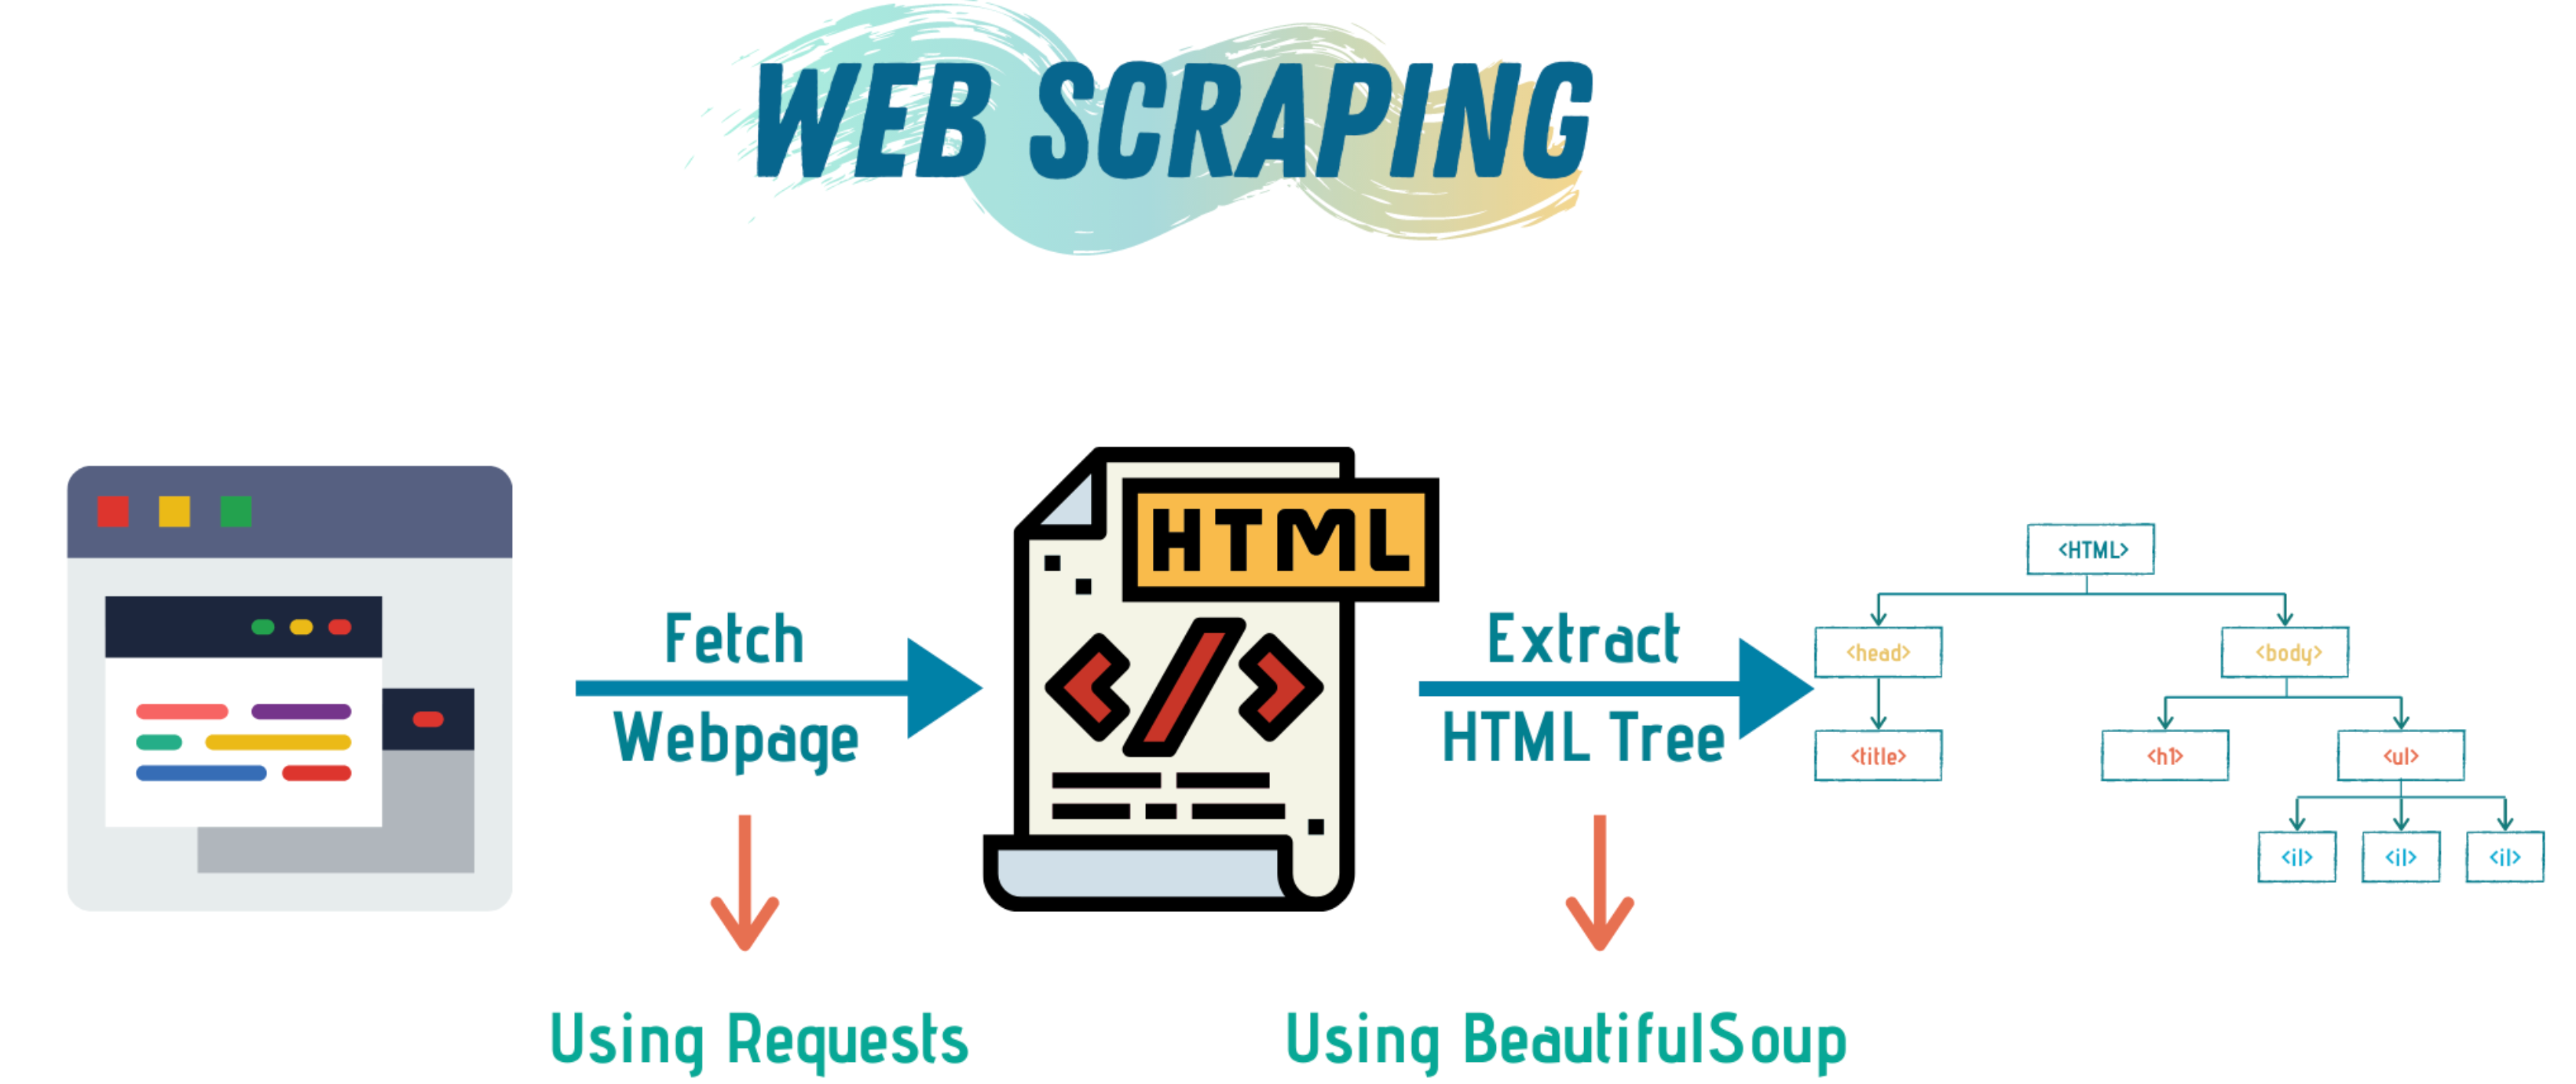

# Processing tables on websites
1. Let's collect a lot of site pages;
2. we count the table with information from each page;
3. Find the minimum and maximum salaries for each city for each year.

To begin with, let's pay attention to the fact that we constantly download the page, configure the encoding and turn to `BeautifulSoup`. Let's put these requests in a separate function:

In [1]:
def get_soup_by_url(current_url):
    page = requests.get(current_url)      # Let's load the page
    page.encoding = 'utf-8'               # Let's set the correct encoding
    soup = BeautifulSoup(page.text)       # Recognizing the HTML code
    return soup

We will find out the addresses of all the pages of the site, for this:
1. create a set where we will save the page addresses,
2. as long as we have the address of the next page:
    1. we will download the next page,
    2. add her address to the set,
    3. look for a link to a new page in the code of the next page, and if there is no such link:
        * let's stop the cycle, since we have reached the end of the site,
    4. (if we find a new link) update the address of the next page and return to the beginning of the cycle,

3. At the end of the program, we will display a list of the found addresses.

In [2]:
from bs4 import BeautifulSoup
import requests

base_url = 'https://online.hse.ru/python-as-foreign/2/'
current_page = ''
current_url = base_url + current_page

urls = set()
while True:
    print(f'Looking for a new link on the page {current_url}')
    soup = get_soup_by_url(current_url)

    urls.add(current_url)   # Add the address of the open page to the set of addresses
    
    next_link = soup.find('a', text='предыдущий')   # Find the tag with the address of the new page
    if not next_link:                 # If there is no link to the new page
        break                         # — let's finish the page search by exiting the loop
    new_page = next_link.get('href')  # We will find out the address from this tag
    current_url = base_url + new_page # Let's get ready to upload a new page

for link in urls:   # Let's output the addresses of all the pages of the site
    print(link)

Looking for a new link on the page https://online.hse.ru/python-as-foreign/2/
Looking for a new link on the page https://online.hse.ru/python-as-foreign/2/2018.html
Looking for a new link on the page https://online.hse.ru/python-as-foreign/2/2017.html
Looking for a new link on the page https://online.hse.ru/python-as-foreign/2/2016.html
Looking for a new link on the page https://online.hse.ru/python-as-foreign/2/2015.html
Looking for a new link on the page https://online.hse.ru/python-as-foreign/2/2014.html
Looking for a new link on the page https://online.hse.ru/python-as-foreign/2/2013.html
https://online.hse.ru/python-as-foreign/2/2016.html
https://online.hse.ru/python-as-foreign/2/2015.html
https://online.hse.ru/python-as-foreign/2/2014.html
https://online.hse.ru/python-as-foreign/2/2013.html
https://online.hse.ru/python-as-foreign/2/2017.html
https://online.hse.ru/python-as-foreign/2/
https://online.hse.ru/python-as-foreign/2/2018.html


Let's learn how to parse the HTML code of a table and create a dictionary based on it. Let's try to find a table and output the HTML code of all its rows:

In [3]:
from bs4 import BeautifulSoup
import requests

url = 'https://online.hse.ru/python-as-foreign/2/'

print(f'Parsing the table on the page {url}:')
soup = get_soup_by_url(url)      

s = soup.find('table')      # Find the table on the page
for tr in s.find_all('tr'): # For each of the found table rows
    print(tr)               # output the line code

Parsing the table on the page https://online.hse.ru/python-as-foreign/2/:
<tr>
<th>Субъект федерации</th>
<th>Январь</th>
<th>Февраль</th>
<th>Март</th>
<th>Апрель</th>
<th>Май</th>
<th>Июнь</th>
<th>Июль</th>
<th>Август</th>
<th>Сентябрь</th>
<th>Октябрь</th>
<th>Ноябрь</th>
<th>Декабрь</th>
</tr>
<tr>
<td>Москва</td>
<td>79680</td>
<td>85370</td>
<td>95179</td>
<td>102907</td>
<td>89045</td>
<td>96030</td>
<td>91607</td>
<td>86733</td>
<td>86684</td>
<td>89129</td>
<td>88657</td>
<td>135375</td>
</tr>
<tr>
<td>Санкт-Петербург</td>
<td>56586</td>
<td>58625</td>
<td>64413</td>
<td>63555</td>
<td>60752</td>
<td>65286</td>
<td>63207</td>
<td>59249</td>
<td>60205</td>
<td>62224</td>
<td>61141</td>
<td>83582</td>
</tr>
<tr>
<td>Нижний Новгород</td>
<td>32998</td>
<td>32041</td>
<td>34735</td>
<td>35952</td>
<td>35355</td>
<td>36656</td>
<td>34646</td>
<td>33909</td>
<td>34012</td>
<td>34867</td>
<td>35876</td>
<td>48768</td>
</tr>
<tr>
<td>Пермь</td>
<td>34035</td>
<td>33932</td>
<td>36919

Note that we are only interested in the rows of the data table, i.e. the rows with the tags `td`, not `th`. Extract the code of all data cells (`td` tags):

In [4]:
from bs4 import BeautifulSoup
import requests

url = 'https://online.hse.ru/python-as-foreign/2/'

print(f'Parsing the table on the {url} page')
soup = get_soup_by_url(url)      

s = soup.find('table')      
for tr in s.find_all('tr'):         # Inside each row of the table
    for td in tr.find_all('td'):    # For each of the found data cells
        print(td)                   # output the HTML code of the cell

Parsing the table on the https://online.hse.ru/python-as-foreign/2/ page
<td>Москва</td>
<td>79680</td>
<td>85370</td>
<td>95179</td>
<td>102907</td>
<td>89045</td>
<td>96030</td>
<td>91607</td>
<td>86733</td>
<td>86684</td>
<td>89129</td>
<td>88657</td>
<td>135375</td>
<td>Санкт-Петербург</td>
<td>56586</td>
<td>58625</td>
<td>64413</td>
<td>63555</td>
<td>60752</td>
<td>65286</td>
<td>63207</td>
<td>59249</td>
<td>60205</td>
<td>62224</td>
<td>61141</td>
<td>83582</td>
<td>Нижний Новгород</td>
<td>32998</td>
<td>32041</td>
<td>34735</td>
<td>35952</td>
<td>35355</td>
<td>36656</td>
<td>34646</td>
<td>33909</td>
<td>34012</td>
<td>34867</td>
<td>35876</td>
<td>48768</td>
<td>Пермь</td>
<td>34035</td>
<td>33932</td>
<td>36919</td>
<td>37721</td>
<td>38887</td>
<td>40614</td>
<td>37150</td>
<td>37067</td>
<td>36948</td>
<td>37773</td>
<td>37986</td>
<td>52684</td>


You can see that all data cells can be divided into two types:
1. cells with the name of the city to which the table row belongs;
2. Many cells with numbers.

Let's learn how to turn a table into a dictionary, where the keys will be the names of cities, and the values will be lists of numbers, for this:
1. find the table on the page
2. for each of its lines
    * let's go through all the data cells, and for each cell:
    1. if it consists of more than just numbers:
        * let's create a key in the dictionary, since we found a cell with the name of the city,
    2. otherwise (if it consists only of digits):
        * add the number from the cell to the data list of the corresponding city.

In [5]:
from bs4 import BeautifulSoup
import requests

url = 'https://online.hse.ru/python-as-foreign/2/'

print(f'Recognizing the table on the {url} page')
soup = get_soup_by_url(url)      

table = {}                  # Create an empty dictionary to store the table
s = soup.find('table')      
for tr in s.find_all('tr'): 
    for td in tr.find_all('td'):  
        if not td.text.isdigit():   # If there are more than just numbers in the cell — 
            city = td.text          # this is the name of the city
            table[city] = []        # Let's create a new city in the table
        else:                       # If there are only numbers in the cell —
            table[city].append(int(td.text))
            # Add the number from the cell to the list with city statistics

for city in table:
    print(f'{city}: {table[city]}')

Recognizing the table on the https://online.hse.ru/python-as-foreign/2/ page
Москва: [79680, 85370, 95179, 102907, 89045, 96030, 91607, 86733, 86684, 89129, 88657, 135375]
Санкт-Петербург: [56586, 58625, 64413, 63555, 60752, 65286, 63207, 59249, 60205, 62224, 61141, 83582]
Нижний Новгород: [32998, 32041, 34735, 35952, 35355, 36656, 34646, 33909, 34012, 34867, 35876, 48768]
Пермь: [34035, 33932, 36919, 37721, 38887, 40614, 37150, 37067, 36948, 37773, 37986, 52684]


The table is recognized. Let's allocate the table code to a function that will accept a `soup` with the found table, and return a dictionary of lists:

In [6]:
# This function accepts only one parameter — BeautifulSoup for the table
def parse_table_to_dict(s):
    table = {}    
    for tr in s.find_all('tr'): 
        for td in tr.find_all('td'): 
            if not td.text.isdigit(): 
                city = td.text
                table[city] = [] 
            else:
                table[city].append(int(td.text))
    return table      # Let's return the resulting table to the main program

Let's check that the function works by replacing table recognition in an already written program with a call to the `parse_table_to_dict()` function:

In [7]:
from bs4 import BeautifulSoup
import requests

url = 'https://online.hse.ru/python-as-foreign/2/'

print(f'Parsing the table on the {url} page')
soup = get_soup_by_url(url)      
table_soup = soup.find('table') 

table = parse_table_to_dict(table_soup)     

for city in table:
    print(f'{city}: {table[city]}')

Parsing the table on the https://online.hse.ru/python-as-foreign/2/ page
Москва: [79680, 85370, 95179, 102907, 89045, 96030, 91607, 86733, 86684, 89129, 88657, 135375]
Санкт-Петербург: [56586, 58625, 64413, 63555, 60752, 65286, 63207, 59249, 60205, 62224, 61141, 83582]
Нижний Новгород: [32998, 32041, 34735, 35952, 35355, 36656, 34646, 33909, 34012, 34867, 35876, 48768]
Пермь: [34035, 33932, 36919, 37721, 38887, 40614, 37150, 37067, 36948, 37773, 37986, 52684]


We recognize tables on all pages of the site, for which we will go through all the addresses from the set of `urls` we have already found:

In [8]:
from bs4 import BeautifulSoup
import requests

for url in urls:
    print(f'Parsing the table on the {url} page')
    soup = get_soup_by_url(url)      
    table_soup = soup.find('table') 

    table = parse_table_to_dict(table_soup)     

    for city in table:
        print(f'{city}: {table[city]}')

Parsing the table on the https://online.hse.ru/python-as-foreign/2/2016.html page
Москва: [60162, 67092, 70551, 74733, 69772, 73215, 69015, 68728, 66920, 67025, 67899, 98436]
Санкт-Петербург: [42104, 45919, 48407, 46919, 47370, 50521, 48483, 46084, 47192, 47908, 48591, 65086]
Нижний Новгород: [24959, 26241, 26731, 27673, 28570, 29323, 26889, 27163, 28040, 27481, 28717, 37262]
Пермь: [27347, 27883, 29344, 29732, 30391, 31992, 30433, 30025, 30168, 29914, 30389, 40244]
Parsing the table on the https://online.hse.ru/python-as-foreign/2/2015.html page
Москва: [56095, 60322, 61040, 66127, 64908, 66562, 64927, 59912, 60424, 61527, 62452, 88624]
Санкт-Петербург: [39647, 40550, 42598, 44144, 42656, 44813, 43407, 40520, 41709, 43215, 43479, 57603]
Нижний Новгород: [24447, 25657, 25838, 26674, 26834, 27629, 26533, 24755, 26199, 26269, 26386, 34263]
Пермь: [25826, 25446, 27417, 28248, 27984, 29541, 27997, 27112, 27444, 27535, 27276, 37321]
Parsing the table on the https://online.hse.ru/python-as-f

Finally, let's calculate the minimum and maximum salary for each city in all tables:

In [9]:
from bs4 import BeautifulSoup
import requests

for url in urls:
    print(f'Parsing the table on the {url} page')
    soup = get_soup_by_url(url)      
    table_soup = soup.find('table') 

    year = soup.find('b').text    # Find the year on the page. It is the only one highlighted with the b tag
    print(f'В {year} году:')

    table = parse_table_to_dict(table_soup)     

    for city in table:
        print(f'{city}: max wage - {max(table[city])}')
        print(f'{city}: min wage - {min(table[city])}')

Parsing the table on the https://online.hse.ru/python-as-foreign/2/2016.html page
В 2016 году:
Москва: max wage - 98436
Москва: min wage - 60162
Санкт-Петербург: max wage - 65086
Санкт-Петербург: min wage - 42104
Нижний Новгород: max wage - 37262
Нижний Новгород: min wage - 24959
Пермь: max wage - 40244
Пермь: min wage - 27347
Parsing the table on the https://online.hse.ru/python-as-foreign/2/2015.html page
В 2015 году:
Москва: max wage - 88624
Москва: min wage - 56095
Санкт-Петербург: max wage - 57603
Санкт-Петербург: min wage - 39647
Нижний Новгород: max wage - 34263
Нижний Новгород: min wage - 24447
Пермь: max wage - 37321
Пермь: min wage - 25446
Parsing the table on the https://online.hse.ru/python-as-foreign/2/2014.html page
В 2014 году:
Москва: max wage - 82593
Москва: min wage - 53584
Санкт-Петербург: max wage - 54444
Санкт-Петербург: min wage - 36000
Нижний Новгород: max wage - 34899
Нижний Новгород: min wage - 23538
Пермь: max wage - 36869
Пермь: min wage - 24280
Parsing the t

The final program of this notebook:

In [10]:
def get_soup_by_url(current_url):
    page = requests.get(current_url)      # Let's load the page
    page.encoding = 'utf-8'               # Let's set the correct encoding
    soup = BeautifulSoup(page.text)       # Recognizing the HTML code
    return soup                           # We will return the ready-to-use code

# This function accepts only one parameter — BeautifulSoup for the table
def parse_table_to_dict(s):
    table = {}                          # Create an empty dictionary to store the table
    for tr in s.find_all('tr'):         # Inside each row of the table
        for td in tr.find_all('td'):    # For each of the found data cells
            if not td.text.isdigit():   # If there are more than just numbers in the cell — 
                city = td.text          # this is the name of the city
                table[city] = []        # Let's create a new city in the table
            else:                       # If there are only numbers in the cell —
                table[city].append(int(td.text))
                      # Add the number from the cell to the list with city statistics
    return table      # Let's return the resulting list dictionary to the main program

from bs4 import BeautifulSoup
import requests

base_url = 'https://online.hse.ru/python-as-foreign/2/' # Let's keep the address common to all pages
current_page = ''
current_url = base_url + current_page

urls = set()    # Let's create a set where we will store the addresses of all the pages of the site
while True:
    print(f'Looking for a new link on the {current_url} page')
    soup = get_soup_by_url(current_url)

    urls.add(current_url)   # Add the address of the open page to the set of addresses
    
    next_link = soup.find('a', text='предыдущий')   # Find the tag with the address of the new page
    if not next_link:                 # If there is no link to the new page
        break                         # — let's finish the page search by exiting the loop
    new_page = next_link.get('href')  # We will find out the address from this tag
    current_url = base_url + new_page # Let's get ready to upload a new page

for url in urls:
    print (f'Decompose the table on the page {url}')
    soup = get_soup_by_url(url)      
    table_soup = soup.find('table') 

    year = soup.find('b').text    # Find the year on the page. It is the only one highlighted with the b tag
    print(f'В {year} году:')

    table = parse_table_to_dict(table_soup)     

    for city in table:
        print(f'{city}: max wage - {max(table[city])}')
        print(f'{city}: min wage - {min(table[city])}')

Looking for a new link on the https://online.hse.ru/python-as-foreign/2/ page
Looking for a new link on the https://online.hse.ru/python-as-foreign/2/2018.html page
Looking for a new link on the https://online.hse.ru/python-as-foreign/2/2017.html page
Looking for a new link on the https://online.hse.ru/python-as-foreign/2/2016.html page
Looking for a new link on the https://online.hse.ru/python-as-foreign/2/2015.html page
Looking for a new link on the https://online.hse.ru/python-as-foreign/2/2014.html page
Looking for a new link on the https://online.hse.ru/python-as-foreign/2/2013.html page
Decompose the table on the page https://online.hse.ru/python-as-foreign/2/2016.html
В 2016 году:
Москва: max wage - 98436
Москва: min wage - 60162
Санкт-Петербург: max wage - 65086
Санкт-Петербург: min wage - 42104
Нижний Новгород: max wage - 37262
Нижний Новгород: min wage - 24959
Пермь: max wage - 40244
Пермь: min wage - 27347
Decompose the table on the page https://online.hse.ru/python-as-forei